## EDA - Student Academic Performance Placement 

This project analyzes student placement outcomes using academic performance, skills, internships, and project experience to determine placement status and salary influence. The study identifies key factors impacting employability and compensation through exploratory data analysis.

In [2]:
# importing python libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the Dataset
df = pd.read_csv('C:\Downloads\student_academic_placement_performance_dataset.csv')


In [4]:
# Explore the data and Understand dataset size
df.sample(5)
df.shape

(5000, 18)

# 1. Problem Understanding 
Why are we Analyzing this data? 
- Analyzing this data to find which factors are affecting the student Placement.
- Also, to find out which factors has impacted for more packages

# 2. Understanding Columns & Data Types

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_id                  5000 non-null   int64  
 1   gender                      5000 non-null   object 
 2   ssc_percentage              5000 non-null   int64  
 3   hsc_percentage              5000 non-null   int64  
 4   degree_percentage           5000 non-null   int64  
 5   cgpa                        5000 non-null   float64
 6   entrance_exam_score         5000 non-null   int64  
 7   technical_skill_score       5000 non-null   int64  
 8   soft_skill_score            5000 non-null   int64  
 9   internship_count            5000 non-null   int64  
 10  live_projects               5000 non-null   int64  
 11  work_experience_months      5000 non-null   int64  
 12  certifications              5000 non-null   int64  
 13  attendance_percentage       5000 

In [6]:
df.dtypes

student_id                      int64
gender                         object
ssc_percentage                  int64
hsc_percentage                  int64
degree_percentage               int64
cgpa                          float64
entrance_exam_score             int64
technical_skill_score           int64
soft_skill_score                int64
internship_count                int64
live_projects                   int64
work_experience_months          int64
certifications                  int64
attendance_percentage           int64
backlogs                        int64
extracurricular_activities     object
placement_status                int64
salary_package_lpa            float64
dtype: object

In [7]:
# converting the object datatype into integer for better analysis

df['extracurricular_activities'] = df['extracurricular_activities'].eq('Yes').astype(int)

In [8]:
df.isnull().sum()

student_id                    0
gender                        0
ssc_percentage                0
hsc_percentage                0
degree_percentage             0
cgpa                          0
entrance_exam_score           0
technical_skill_score         0
soft_skill_score              0
internship_count              0
live_projects                 0
work_experience_months        0
certifications                0
attendance_percentage         0
backlogs                      0
extracurricular_activities    0
placement_status              0
salary_package_lpa            0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

# Unique Values Analysis

In [10]:
print(df['gender'].value_counts())
print(f"\nPercentage:")
print(df['gender'].value_counts(normalize=True).mul(100).round(2))

print("\nExtracurricular Activities:")
print(f"Percentage:")
print(df['extracurricular_activities'].value_counts(normalize=True).mul(100).round(2))

print("\nPlacement Status:")
print(df['placement_status'].value_counts())
print(f"\nPercentage:")
print(df['placement_status'].value_counts(normalize=True).mul(100).round(2))

gender
Male      2504
Female    2496
Name: count, dtype: int64

Percentage:
gender
Male      50.08
Female    49.92
Name: proportion, dtype: float64

Extracurricular Activities:
Percentage:
extracurricular_activities
0    51.06
1    48.94
Name: proportion, dtype: float64

Placement Status:
placement_status
0    4134
1     866
Name: count, dtype: int64

Percentage:
placement_status
0    82.68
1    17.32
Name: proportion, dtype: float64


In [11]:
print(f"\n📊 PLACEMENT OVERVIEW:")
total_students = len(df)
placed = df[df['placement_status'] == 1]
not_placed = df[df['placement_status'] == 0]
print(f"   Total Students: {total_students}")
print(f"   Placed: {len(placed)} ({len(placed)/total_students*100:.2f}%)")
print(f"   Not Placed: {len(not_placed)} ({len(not_placed)/total_students*100:.2f}%)")


📊 PLACEMENT OVERVIEW:
   Total Students: 5000
   Placed: 866 (17.32%)
   Not Placed: 4134 (82.68%)


# 3. Descriptive Analysis 

In [12]:
df.describe()

,student_id,ssc_percentage,hsc_percentage,degree_percentage,cgpa,entrance_exam_score,technical_skill_score,soft_skill_score,internship_count,live_projects,work_experience_months,certifications,attendance_percentage,backlogs,extracurricular_activities,placement_status,salary_package_lpa
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,72.425800,71.910800,71.845200,7.678326,69.197800,69.651000,69.839600,1.987800,2.491800,11.982000,2.481000,79.433400,2.518400,0.489400,0.173200,1.59589
std,1443.520003,13.199642,12.842781,10.013196,1.237084,17.325528,17.179704,17.170732,1.410975,1.704967,7.258114,1.719485,11.638585,1.721004,0.499938,0.378458,3.77582
min,1.000000,50.000000,50.000000,55.000000,5.500000,40.000000,40.000000,40.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.00000
25%,1250.750000,61.000000,61.000000,63.000000,6.617500,54.000000,55.000000,55.000000,1.000000,1.000000,6.000000,1.000000,69.000000,1.000000,0.000000,0.000000,0.00000
50%,2500.500000,72.000000,72.000000,72.000000,7.700000,69.000000,70.000000,69.000000,2.000000,3.000000,12.000000,2.000000,80.000000,3.000000,0.000000,0.000000,0.00000
75%,3750.250000,84.000000,83.000000,80.000000,8.750000,84.000000,84.000000,85.000000,3.000000,4.000000,18.000000,4.000000,89.000000,4.000000,1.000000,0.000000,0.00000
max,5000.000000,95.000000,94.000000,89.000000,9.800000,99.000000,99.000000,99.000000,4.000000,5.000000,24.000000,5.000000,99.000000,5.000000,1.000000,1.000000,14.99000


In [25]:
print(" PLACED vs NOT PLACED COMPARISON")
print("="*80)

comparison_features = ['cgpa', 'technical_skill_score', 'soft_skill_score', 
                       'entrance_exam_score', 'internship_count', 
                       'work_experience_months', 'backlogs', 'attendance_percentage']

print("\nAverage Values Comparison:")
print(f"{'Feature':<30} {'Placed':<15} {'Not Placed':<15} {'Difference':<15}")
print("-" * 75)

for feature in comparison_features:
    placed_mean = placed[feature].mean()
    not_placed_mean = not_placed[feature].mean()
    diff = placed_mean - not_placed_mean
    print(f"{feature:<30} {placed_mean:<15.2f} {not_placed_mean:<15.2f} {diff:<15.2f}")

 PLACED vs NOT PLACED COMPARISON

Average Values Comparison:
Feature                        Placed          Not Placed      Difference     
---------------------------------------------------------------------------
cgpa                           8.43            7.52            0.91           
technical_skill_score          78.91           67.71           11.19          
soft_skill_score               77.26           68.29           8.97           
entrance_exam_score            69.23           69.19           0.04           
internship_count               2.02            1.98            0.04           
work_experience_months         12.32           11.91           0.41           
backlogs                       1.01            2.83            -1.83          
attendance_percentage          79.13           79.50           -0.37          


# 4. Univariate Analysis (One Variable at a Time)

C:\Users\rahip\AppData\Local\Temp\ipykernel_23080\1983441820.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Placed', 'Placed'])


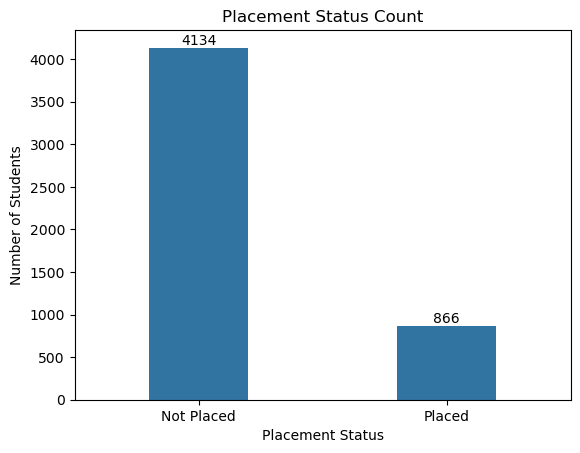

In [13]:
# by taking placement_status column and vizulize it we will get to know overall total student placement status.
ax = sns.countplot(x='placement_status', data=df, width = 0.4)

ax.bar_label(ax.containers[0])
ax.set_xticklabels(['Not Placed', 'Placed'])
plt.xlabel('Placement Status')
plt.ylabel('Number of Students')
plt.title('Placement Status Count')
plt.show()




In [14]:
placed_salary_data = df[df['salary_package_lpa'] > 0]['salary_package_lpa']

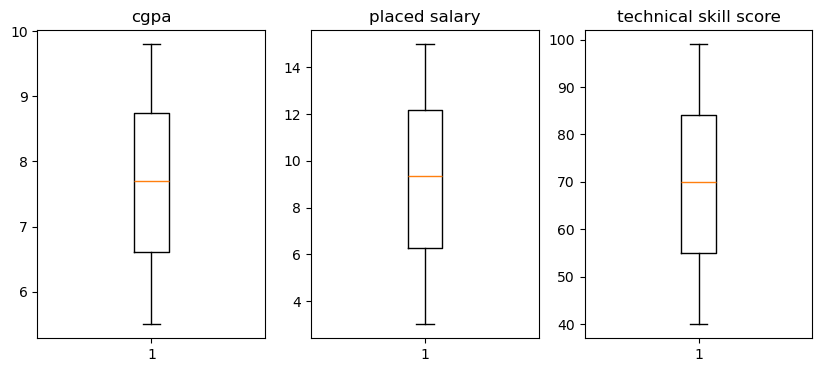

In [17]:
fig,ax = plt.subplots(1,3,figsize = (10,4))
ax[0].boxplot(df['cgpa'])
ax[1].boxplot(placed_salary_data)
ax[2].boxplot(df['technical_skill_score'])

ax[0].set_title('cgpa')
ax[1].set_title('placed salary')
ax[2].set_title('technical skill score')



plt.show()


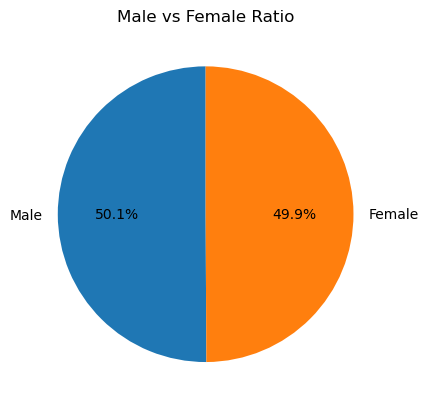

In [16]:
counts = df['gender'].value_counts()

plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Male vs Female Ratio')
plt.show()


[Text(0, 0, '441'), Text(0, 0, '425')]

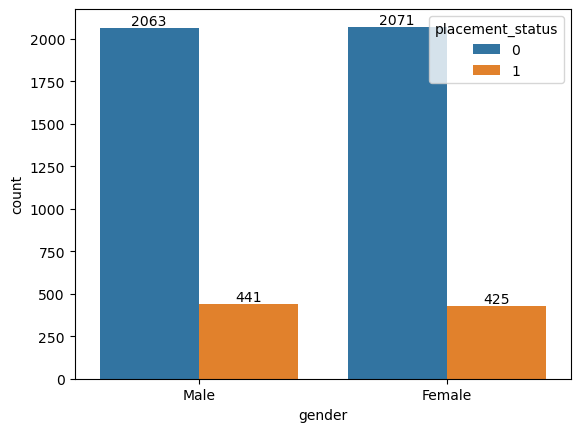

In [17]:
ax = sns.countplot(x='gender', hue='placement_status', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


Text(0, 0.5, 'Frequency')

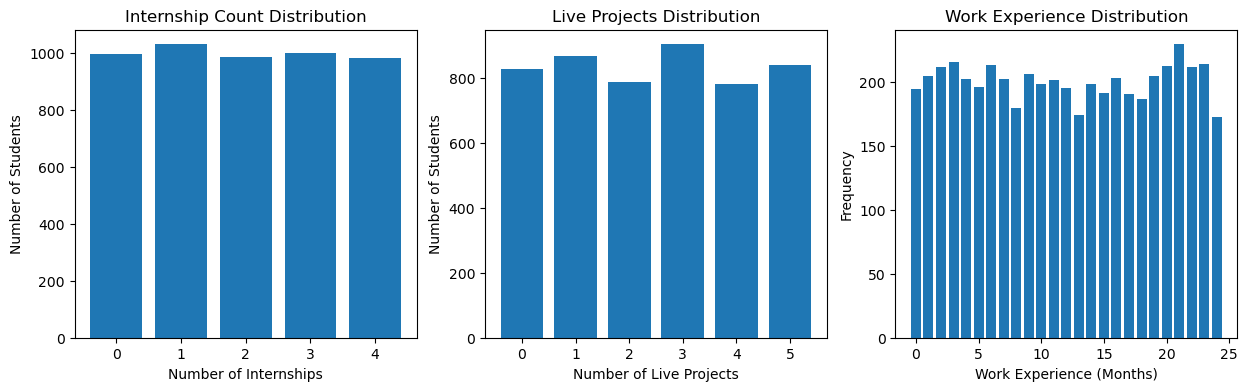

In [18]:
fig,ax = plt.subplots(1,3,figsize = (15,4))

internship_counts = df['internship_count'].value_counts().sort_index()
projects_counts = df['live_projects'].value_counts().sort_index()
work_experience_counts = df['work_experience_months'].value_counts().sort_index()

ax[0].bar(internship_counts.index, internship_counts.values)
ax[1].bar(projects_counts.index, projects_counts.values)
ax[2].bar(work_experience_counts.index,work_experience_counts.values)

ax[0].set_title('Internship Count Distribution')
ax[0].set_xlabel('Number of Internships')
ax[0].set_ylabel('Number of Students')

ax[1].set_title('Live Projects Distribution')
ax[1].set_xlabel('Number of Live Projects')
ax[1].set_ylabel('Number of Students')

ax[2].set_title('Work Experience Distribution')
ax[2].set_xlabel('Work Experience (Months)')
ax[2].set_ylabel('Frequency')


# 5. Bivariate Analysis (Two Variables)

<h3>Comparing different applicable features with Placement_status</h3>

<Axes: xlabel='placement_status', ylabel='cgpa'>

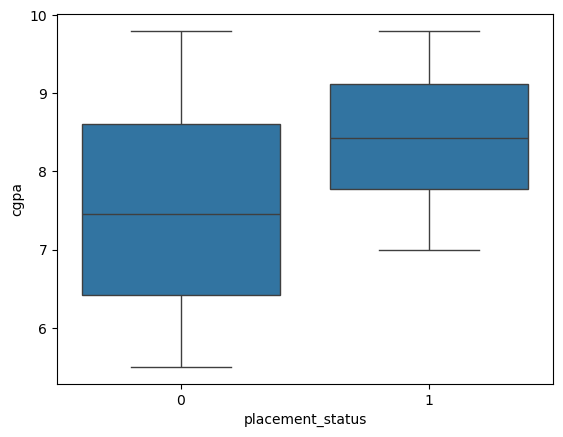

In [ ]:
sns.boxplot(x='placement_status', y='cgpa', data=df)


C:\Users\rahip\AppData\Local\Temp\ipykernel_23080\21451485.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='placement_status', y='soft_skill_score', data=df, estimator=np.mean,
C:\Users\rahip\AppData\Local\Temp\ipykernel_23080\21451485.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='placement_status', y='technical_skill_score', data=df,estimator=np.mean,
C:\Users\rahip\AppData\Local\Temp\ipykernel_23080\21451485.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='placement_status', y='work_experience_months', data=df,estimator=np.mean,
C:\Users\rahip\AppData\Local\Temp\ipykernel_23080\21451485.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='placement_status', y='internship_count', data=df, estimator=np.mean,


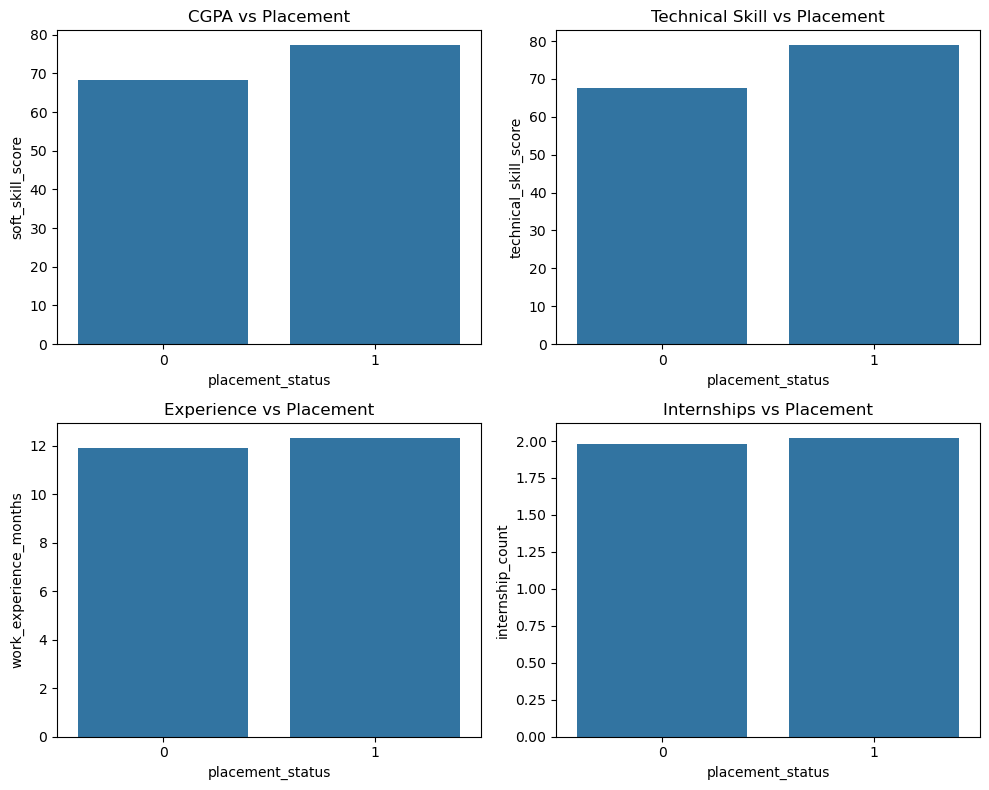

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
sns.barplot(x='placement_status', y='soft_skill_score', data=df, estimator=np.mean,
    ci=None,ax=ax[0,0])
sns.barplot(x='placement_status', y='technical_skill_score', data=df,estimator=np.mean,
    ci=None, ax=ax[0,1])
sns.barplot(x='placement_status', y='work_experience_months', data=df,estimator=np.mean,
    ci=None, ax=ax[1,0])
sns.barplot(x='placement_status', y='internship_count', data=df, estimator=np.mean,
    ci=None,ax=ax[1,1])

ax[0,0].set_title('CGPA vs Placement')
ax[0,1].set_title('Technical Skill vs Placement')
ax[1,0].set_title('Experience vs Placement')
ax[1,1].set_title('Internships vs Placement')

plt.tight_layout()
plt.show()


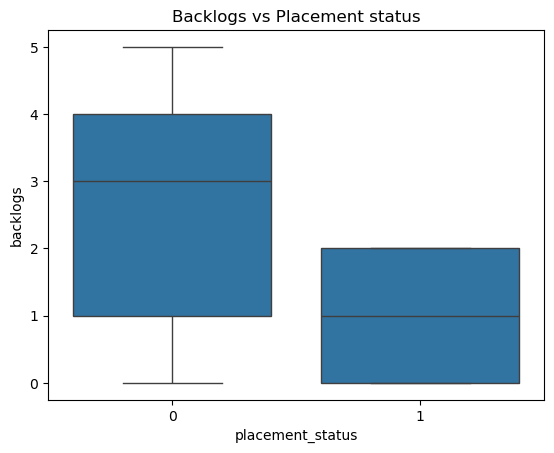

matplotlib.axes._axes.Axes

In [42]:

sns.boxplot(x='placement_status', y='backlogs',data=df)
plt.title("Backlogs vs Placement status")
plt.show()
plt.Axes


<h3>Comparing different applicable features with salary_package_lpa</h3>

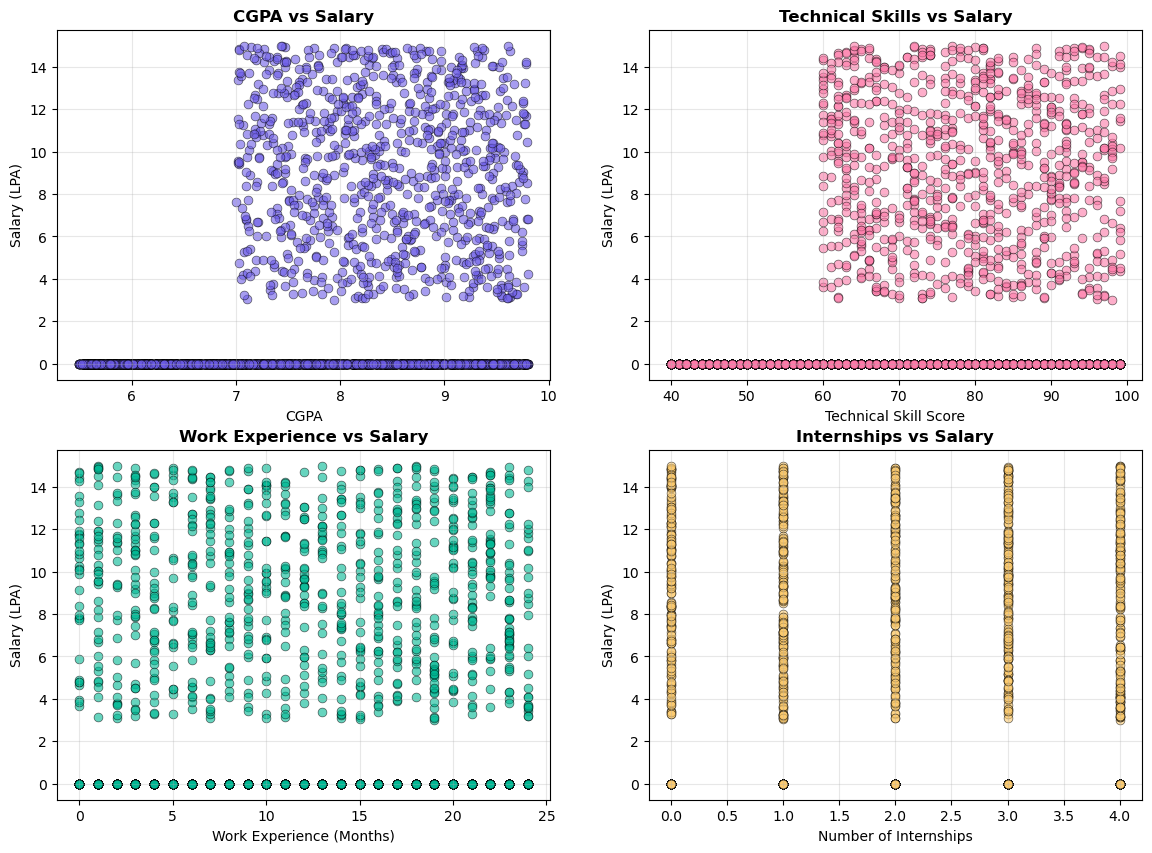

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # CGPA vs Salary
axes[0, 0].scatter(df['cgpa'], df['salary_package_lpa'],
                      alpha=0.6, s=40, color='#6C5CE7', edgecolors='black', linewidth=0.5)
axes[0, 0].set_title('CGPA vs Salary', fontsize=12, weight='bold')
axes[0, 0].set_xlabel('CGPA', fontsize=10)
axes[0, 0].set_ylabel('Salary (LPA)', fontsize=10)
axes[0, 0].grid(alpha=0.3)
    
    # Technical Skills vs Salary
axes[0, 1].scatter(df['technical_skill_score'], df['salary_package_lpa'],
                      alpha=0.6, s=40, color='#FD79A8', edgecolors='black', linewidth=0.5)
axes[0, 1].set_title('Technical Skills vs Salary', fontsize=12, weight='bold')
axes[0, 1].set_xlabel('Technical Skill Score', fontsize=10)
axes[0, 1].set_ylabel('Salary (LPA)', fontsize=10)
axes[0, 1].grid(alpha=0.3)
    
    # Work Experience vs Salary
axes[1, 0].scatter(df['work_experience_months'], df['salary_package_lpa'],
                      alpha=0.6, s=40, color='#00B894', edgecolors='black', linewidth=0.5)
axes[1, 0].set_title('Work Experience vs Salary', fontsize=12, weight='bold')
axes[1, 0].set_xlabel('Work Experience (Months)', fontsize=10)
axes[1, 0].set_ylabel('Salary (LPA)', fontsize=10)
axes[1, 0].grid(alpha=0.3)
    
    # Internships vs Salary
axes[1, 1].scatter(df['internship_count'], df['salary_package_lpa'],
                      alpha=0.6, s=40, color='#FDCB6E', edgecolors='black', linewidth=0.5)
axes[1, 1].set_title('Internships vs Salary', fontsize=12, weight='bold')
axes[1, 1].set_xlabel('Number of Internships', fontsize=10)
axes[1, 1].set_ylabel('Salary (LPA)', fontsize=10)
axes[1, 1].grid(alpha=0.3)

## 6. Correlation Analysis

<h3>Correlation with Placement Status</h3>

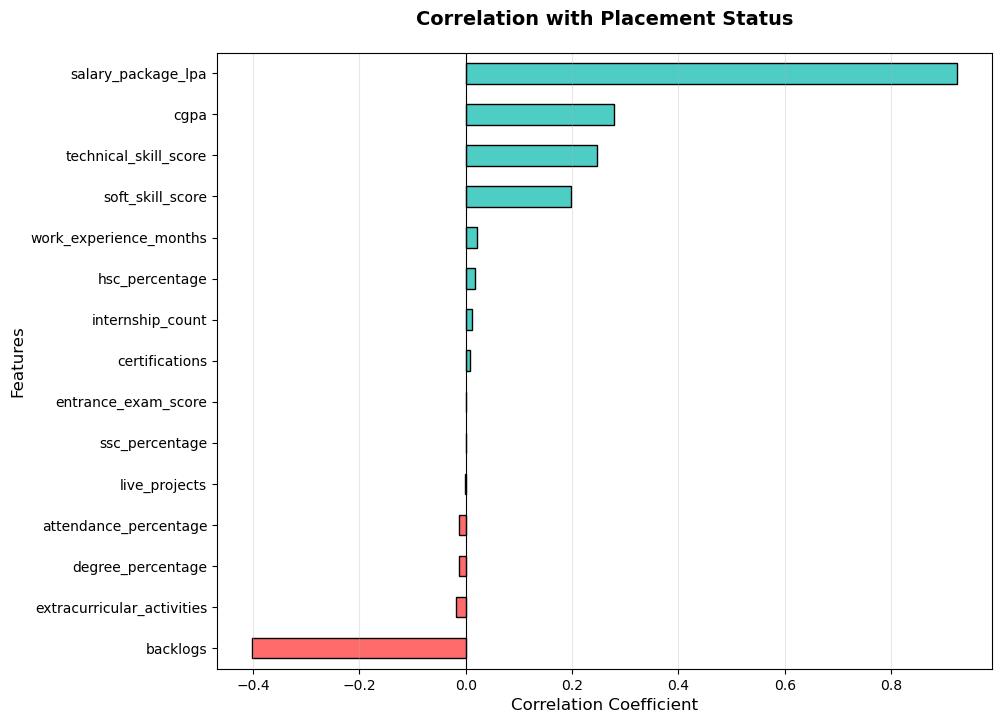

In [21]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols_clean = [col for col in numerical_cols if col != 'student_id']

corr_placement_sorted = df[numerical_cols_clean].corr()['placement_status'].drop('placement_status').sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#FF6B6B' if x < 0 else '#4ECDC4' for x in corr_placement_sorted.values]
corr_placement_sorted.plot(kind='barh', ax=ax, color=colors, edgecolor='black')
ax.set_title('Correlation with Placement Status', fontsize=14, weight='bold', pad=20)
ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

<h3>Correlation with Salary</h3>

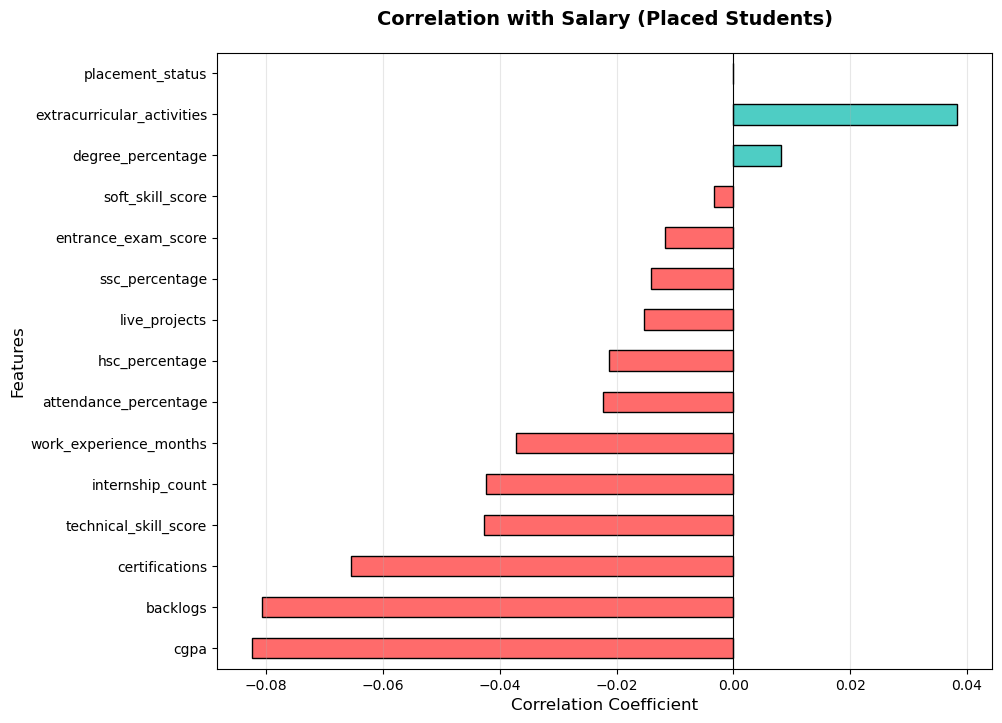

In [22]:
if len(placed) > 0:
    corr_salary_sorted = placed[numerical_cols_clean].corr()['salary_package_lpa'].drop('salary_package_lpa').sort_values(ascending=True)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    colors = ['#FF6B6B' if x < 0 else '#4ECDC4' for x in corr_salary_sorted.values]
    corr_salary_sorted.plot(kind='barh', ax=ax, color=colors, edgecolor='black')
    ax.set_title('Correlation with Salary (Placed Students)', fontsize=14, weight='bold', pad=20)
    ax.set_xlabel('Correlation Coefficient', fontsize=12)
    ax.set_ylabel('Features', fontsize=12)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    ax.grid(axis='x', alpha=0.3)